In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado

df_filtered = obtener_nuevo_avocado()

df_filtered = df_filtered.loc[df_filtered['region_type'] == 'GreaterRegion'].copy() #Si se quiere hacer el calculo por ciudad cambiar por city, sino GreateRegion

# Convert 'Date' to datetime if not already done
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

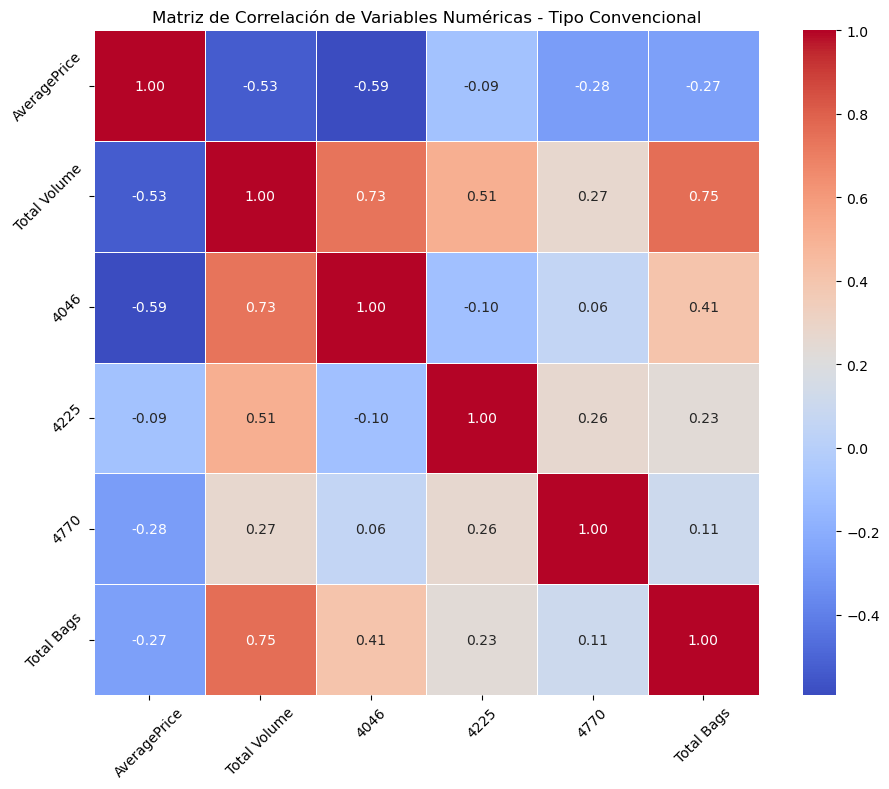

In [10]:
# Filter data for conventional type only
df_conventional = df_filtered[df_filtered['type'] == 'conventional']

# Calculate the correlation matrix for the conventional type data
correlation_matrix = df_conventional[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']].corr()

# Configure the visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# Customize the plot
plt.title('Matriz de Correlación de Variables Numéricas - Tipo Convencional')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


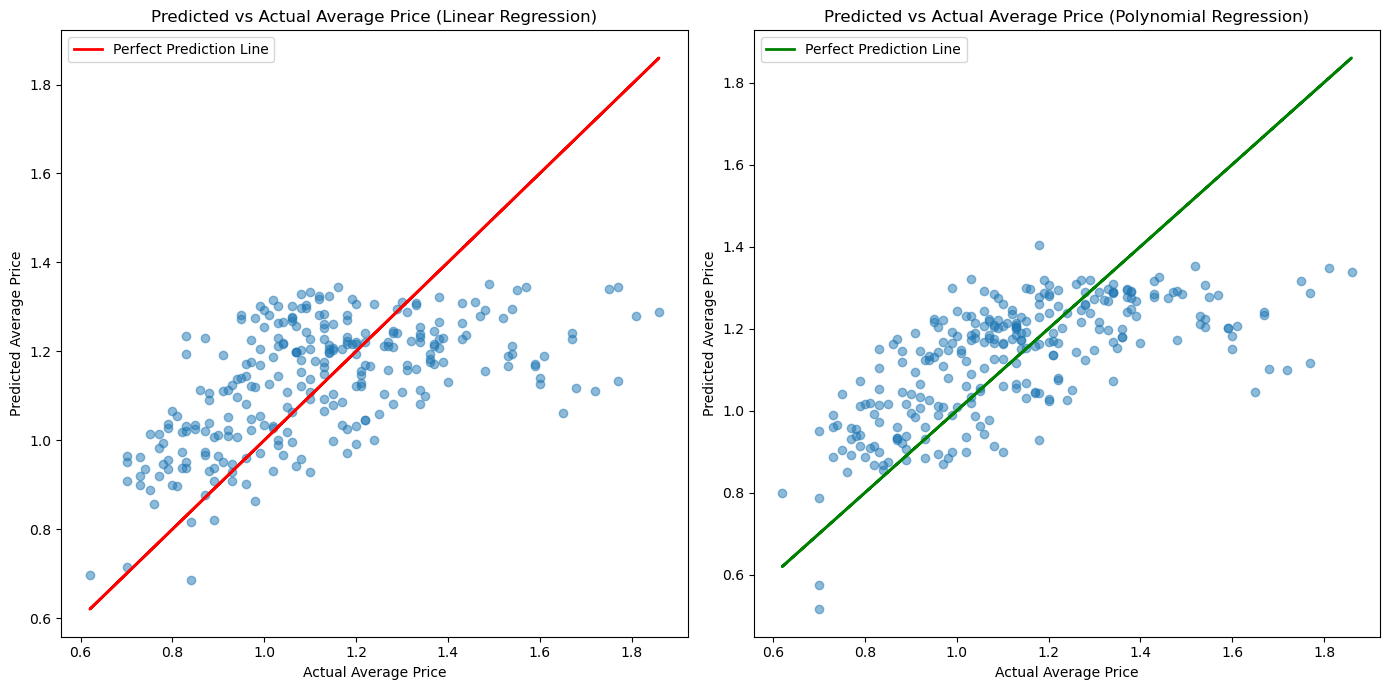

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df_conventional[['Total Volume','Total Bags']]  # Add more features as needed
y = df_conventional['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Polynomial regression model (degree 2 for a quadratic fit)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Plotting actual vs. predicted Average Price for both models
plt.figure(figsize=(14, 7))

# Scatter plot for linear regression predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Predicted vs Actual Average Price (Linear Regression)')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.legend()

# Scatter plot for polynomial regression predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot(y_test, y_test, color='green', linewidth=2, label='Perfect Prediction Line')
plt.title('Predicted vs Actual Average Price (Polynomial Regression)')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.legend()

plt.tight_layout()  # Adjust layout
plt.show()



In [37]:
# Calculate R2 and RMSE for linear regression
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Calculate R2 and RMSE for polynomial regression
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Print the results
print(f"Linear Regression R^2: {r2_linear:.4f}")
print(f"Linear Regression RMSE: {rmse_linear:.4f}")

print(f"Polynomial Regression R^2: {r2_poly:.4f}")
print(f"Polynomial Regression RMSE: {rmse_poly:.4f}")



Linear Regression R^2: 0.3355
Linear Regression RMSE: 0.1991
Polynomial Regression R^2: 0.4255
Polynomial Regression RMSE: 0.1852


In [38]:
# Assuming df_conventional is your dataframe with the required columns
# Create new interaction terms between Total Volume and each PLU column
df_conventional['TotalVolume_4046'] = df_conventional['Total Volume'] * df_conventional['4046']
df_conventional['TotalVolume_4225'] = df_conventional['Total Volume'] * df_conventional['4225']
df_conventional['TotalVolume_4770'] = df_conventional['Total Volume'] * df_conventional['4770']

# Display the first few rows to verify the new columns
print(df_conventional[['Total Volume', '4046', '4225', '4770', 'TotalVolume_4046', 'TotalVolume_4225', 'TotalVolume_4770']].head())


     Total Volume        4046        4225       4770  TotalVolume_4046  \
312    5040365.47  1833946.59  1760956.02  232755.85      9.243761e+12   
313    4695737.21  1676601.43  1543280.76  266689.82      7.872880e+12   
314    5259354.30  1806690.08  1627240.76  232985.13      9.502023e+12   
315    5775536.27  1943065.50  2100246.17  221957.26      1.122225e+13   
316    4575710.62  1461699.38  1810202.70  222311.07      6.688313e+12   

     TotalVolume_4225  TotalVolume_4770  
312      8.875862e+12      1.173175e+12  
313      7.246841e+12      1.252305e+12  
314      8.558236e+12      1.225351e+12  
315      1.213005e+13      1.281922e+12  
316      8.282964e+12      1.017231e+12  


/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_7479/3479645590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conventional['TotalVolume_4046'] = df_conventional['Total Volume'] * df_conventional['4046']
/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_7479/3479645590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conventional['TotalVolume_4225'] = df_conventional['Total Volume'] * df_conventional['4225']
/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_7479/34

In [39]:
# Define features including the new interaction terms
X = df_conventional[['Total Volume', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags',
                     'TotalVolume_4046', 'TotalVolume_4225', 'TotalVolume_4770']]
y = df_conventional['AveragePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate R2 and RMSE to evaluate the model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R^2: 0.4030
RMSE: 0.1681
